In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#Carregando o DataSet----------------------------------------
df = pd.read_csv('TitanicDATA.csv')
#Carregando as 5 primeiras linhas----------------------------------------
print(df.head())

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age     Fare Cabin Embarked  
0    male  22.0     7.25   NaN        S  
1  female  38.0  712.833   C85        C  
2  female  26.0    7.925   NaN        S  
3  female  35.0     53.1  C123        S  
4    male  35.0    08.05   NaN        S  


In [34]:
#Carregando algumas informações----------------------------------------
print(df.info())
print(df.describe())
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   Fare      891 non-null    object 
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 55.8+ KB
None
         Survived      Pclass         Age
count  891.000000  891.000000  714.000000
mean     0.383838    2.308642   29.699118
std      0.486592    0.836071   14.526497
min      0.000000    1.000000    0.420000
25%      0.000000    2.000000   20.125000
50%      0.000000    3.000000   28.000000
75%      1.000000    3.000000   38.000000
max      1.000000    3.000000   80.000000
Sex
male      577
female    314
Name: count, dtype: int64
Em

In [35]:
df = df.drop_duplicates()
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Survived'] = df['Survived'].astype(bool)
print(df.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
Fare          0
Cabin       687
Embarked      0
dtype: int64


C:\Users\08234\AppData\Local\Temp\ipykernel_18776\3586897061.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\08234\AppData\Local\Temp\ipykernel_18776\3586897061.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [36]:
#Criando coluna faixa etária----------------------------------------
def categorize_age(age):
    if age < 18: return 'Criança'
    elif age < 60: return 'Adulto'
    else: return 'Idoso'
df['faixa_etária'] = df['Age'].apply(categorize_age)
#Filtrando dados: somente sobreviventes----------------------------------------
survivors = df[df['Survived'] == True]
print(survivors.head())

#Agrupando e e agregando----------------------------------------
grouped = df.groupby(['Pclass','Sex']).agg({'Survived':'mean','Age':'mean','Fare':'median'}).reset_index()
print(grouped)

#Ordenando por tarifa decrescente----------------------------------------
print(df.sort_values(by='Fare',ascending=False).head())

   Survived  Pclass                                               Name  \
1      True       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2      True       3                             Heikkinen, Miss. Laina   
3      True       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
8      True       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9      True       2                Nasser, Mrs. Nicholas (Adele Achem)   

      Sex   Age     Fare Cabin Embarked faixa_etária  
1  female  38.0  712.833   C85        C       Adulto  
2  female  26.0    7.925   NaN        S       Adulto  
3  female  35.0     53.1  C123        S       Adulto  
8  female  27.0  11.1333   NaN        S       Adulto  
9  female  14.0  300.708   NaN        C      Criança  


TypeError: agg function failed [how->median,dtype->object]

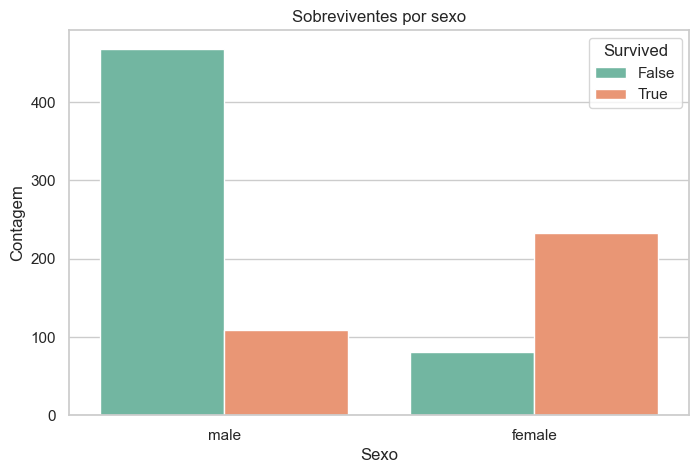

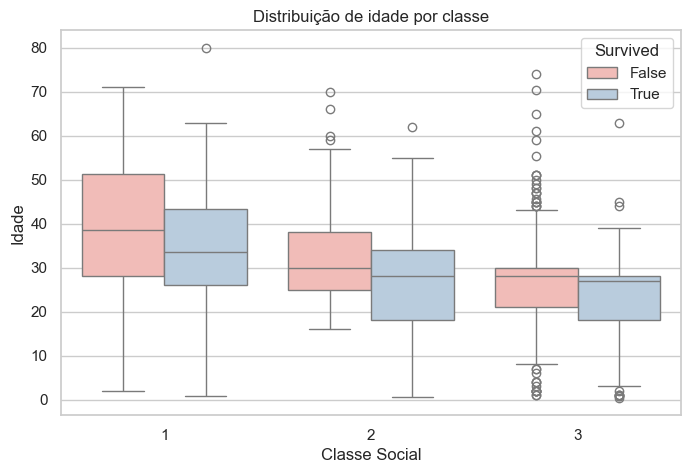

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

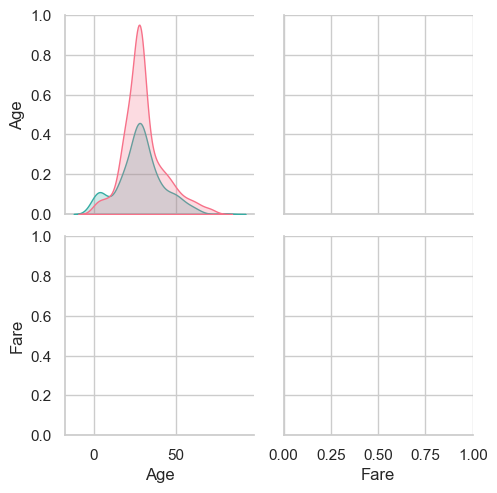

In [37]:
#Configuração estilo SeaBorn----------------------------------------
sns.set(style='whitegrid')

#Gráfico 1----------------------------------------
plt.figure(figsize = (8,5))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title('Sobreviventes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

#Gráfico 2----------------------------------------
plt.figure(figsize = (8,5))
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived', palette='Pastel1')
plt.title('Distribuição de idade por classe')
plt.xlabel('Classe Social')
plt.ylabel('Idade')
plt.show()

#Gráfico 3----------------------------------------
g = sns.pairplot(df, vars=['Age','Fare'], hue='Survived', palette='husl')
g.fig.suptitle('Relações entre idade, tarifa e sobrevivência', y=1.02)  # Use o .fig
plt.show()